In [1]:
# !pip install zarr s3fs

import os
from typing import Union

import s3fs
import zarr

# AWS_ZARR_ROOT = (
#     "s3://gov-nasa-hdrl-data1/contrib/fdl-sdoml/fdl-sdoml-v2/sdomlv2_small.zarr/"
# )

AWS_ZARR_ROOT = (
    "s3://gov-nasa-hdrl-data1/contrib/fdl-sdoml/fdl-sdoml-v2/sdomlv2.zarr/"  # full dataset
)

def s3_connection(path_to_zarr: os.path) -> s3fs.S3Map:
    """
    Instantiate connection to aws for a given path `path_to_zarr`
    """
    return s3fs.S3Map(
        root=path_to_zarr,
        s3=s3fs.S3FileSystem(anon=True),
        # anonymous access requires no credentials
        check=False,
    )


def load_single_aws_zarr(
    path_to_zarr: os.path,
    cache_max_single_size: int = None,
) -> Union[zarr.Array, zarr.Group]:
    """
    load zarr from s3 using LRU cache
    """
    return zarr.open(
        zarr.LRUStoreCache(
            store=s3_connection(path_to_zarr),
            max_size=cache_max_single_size,
        ),
        mode="r",
    )

root = load_single_aws_zarr(
    path_to_zarr=AWS_ZARR_ROOT,
)

print(root.tree())


/
 ├── 2010
 │   ├── 131A (47116, 512, 512) float32
 │   ├── 1600A (47972, 512, 512) float32
 │   ├── 1700A (46858, 512, 512) float32
 │   ├── 171A (47186, 512, 512) float32
 │   ├── 193A (47134, 512, 512) float32
 │   ├── 211A (47186, 512, 512) float32
 │   ├── 304A (47131, 512, 512) float32
 │   ├── 335A (47187, 512, 512) float32
 │   └── 94A (46930, 512, 512) float32
 ├── 2011
 │   ├── 131A (75200, 512, 512) float32
 │   ├── 1600A (75814, 512, 512) float32
 │   ├── 1700A (74839, 512, 512) float32
 │   ├── 171A (75660, 512, 512) float32
 │   ├── 193A (75664, 512, 512) float32
 │   ├── 211A (75678, 512, 512) float32
 │   ├── 304A (74199, 512, 512) float32
 │   ├── 335A (75624, 512, 512) float32
 │   └── 94A (75138, 512, 512) float32
 ├── 2012
 │   ├── 131A (76849, 512, 512) float32
 │   ├── 1600A (76630, 512, 512) float32
 │   ├── 1700A (69091, 512, 512) float32
 │   ├── 171A (76750, 512, 512) float32
 │   ├── 193A (76852, 512, 512) float32
 │   ├── 211A (76870, 512, 512) float32
 │  

In [2]:
data = root["2010"]["131A"]

import dask.array as da
from IPython.core.display import HTML


all_image = da.from_array(data)
HTML(all_image._repr_html_())

In [4]:
type(data)

zarr.core.Array

In [5]:
type(root)

zarr.hierarchy.Group

In [6]:
root.info

Name        : /
Type        : zarr.hierarchy.Group
Read-only   : True
Store type  : zarr.storage.LRUStoreCache
No. members : 11
No. arrays  : 0
No. groups  : 11
Groups      : 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [8]:
root["2010"].info

Name        : /2010
Type        : zarr.hierarchy.Group
Read-only   : True
Store type  : zarr.storage.LRUStoreCache
No. members : 9
No. arrays  : 9
No. groups  : 0
Arrays      : 131A, 1600A, 1700A, 171A, 193A, 211A, 304A, 335A, 94A

In [10]:
data

<zarr.core.Array '/2010/131A' (47116, 512, 512) float32 read-only>

In [14]:
data[0,:,:].shape

(512, 512)

In [18]:
selected_headr = {keys: values[0] for keys, values in data.attrs.items()}
selected_headr

{'ACS_CGT': 'GT3',
 'ACS_ECLP': 'NO',
 'ACS_MODE': 'SCIENCE',
 'ACS_SAFE': 'NO',
 'ACS_SUNP': 'YES',
 'AECDELAY': 1538,
 'AECMODE': 'ON',
 'AECTYPE': 0,
 'AGT1SVY': -5,
 'AGT1SVZ': 4,
 'AGT2SVY': -3,
 'AGT2SVZ': -4,
 'AGT3SVY': -1,
 'AGT3SVZ': 1,
 'AGT4SVY': 0,
 'AGT4SVZ': -1,
 'AIAECENF': 1,
 'AIAECTI': 0,
 'AIAGP1': 0,
 'AIAGP10': 748,
 'AIAGP2': 0,
 'AIAGP3': 0,
 'AIAGP4': 0,
 'AIAGP5': 0,
 'AIAGP6': 0,
 'AIAGP7': 0,
 'AIAGP8': 280,
 'AIAGP9': 344,
 'AIAHFSN': 11711298,
 'AIASEN': 0,
 'AIAWVLEN': 1,
 'AICFGDL1': 0,
 'AICFGDL2': 24,
 'AICFGDL3': 88,
 'AICFGDL4': 236,
 'AIFCPS': 12,
 'AIFDBID': 241,
 'AIFILTYP': 0,
 'AIFOENFL': 1,
 'AIFRMLID': 2908,
 'AIFTSID': 40962,
 'AIFTSWTH': 0,
 'AIFWEN': 270,
 'AIHIS192': 0,
 'AIHIS348': 0,
 'AIHIS604': 0,
 'AIHIS860': 0,
 'AIHISMXB': 0,
 'AIMGFSN': 4,
 'AIMGOTS': 1662681644,
 'AIMGOTSS': 46084,
 'AIMGSHCE': 2900,
 'AIMGSHEN': 13,
 'AIMGTYP': 0,
 'AIMSHCBC': 2956.124023,
 'AIMSHCBE': 2970.040039,
 'AIMSHCTC': 2941.916016,
 'AIMSHCTE': 2926.9040

In [77]:
import numpy as np
import pandas as pd

# cargando los datos de fulguraciones detectadas por el SWPC-GOES
df = pd.read_csv('./data/flares-goes-x-ray-unified.dat', sep='\t')
df['t-inicio'] = pd.to_datetime(df['t-inicio'])
df['t-max'] = pd.to_datetime(df['t-max'])
df['t-fin'] = pd.to_datetime(df['t-fin'])
df = df.drop(['unknown'], axis=1)

# filtramos para obtener aquellas fulguraciones de intensidad mayor a C
df = df[(df['Clase'] == 'C') | (df['Clase'] == 'M') | (df['Clase'] == 'X')]
df = df.reset_index()
# fecha y hora de los máximos de las fulguraciones
max_dates_swpc = df['t-max']
# solamente queremos fechas para las que hay datos del SDO (2010)
max_dates_swpc = max_dates_swpc[max_dates_swpc.dt.tz_localize(None) > np.datetime64('2010-06-20 00:00:00')]

In [78]:
max_dates_swpc

46015   2010-07-08 22:16:00+00:00
46016   2010-07-09 09:01:00+00:00
46017   2010-07-09 19:51:00+00:00
46018   2010-07-13 10:51:00+00:00
46019   2010-07-14 12:30:00+00:00
                   ...           
54102   2017-06-03 19:34:00+00:00
54103   2017-06-05 05:31:00+00:00
54104   2017-06-05 09:55:00+00:00
54105   2017-06-07 03:33:00+00:00
54106   2017-06-07 10:22:00+00:00
Name: t-max, Length: 8092, dtype: datetime64[ns, UTC]

In [40]:
data.shape

(47116, 512, 512)

In [83]:
import datetime
from sunpy.map import Map
import matplotlib.pyplot as plt

flare_image_index = []
flare_info_index = []
for i in range(data.shape[0]):
    selected_headr = { keys: values[i] for keys, values in data.attrs.items() }
    t_obs = selected_headr['T_OBS']
    t_delta = datetime.timedelta(minutes=45)
    for max_time in max_dates_swpc[max_dates_swpc.dt.tz_localize(None) < np.datetime64('2011-01-01 00:00:00')]:
        if ( max_time.tz_localize(None) <= np.datetime64(t_obs) <= (max_time.tz_localize(None) + t_delta) ):
            # img_size = data[i, :,:].shape
            # arr = data[i,:,:]  # image data
            flare_image_index.append(i)
            flare_info_index.append(max_dates_swpc[max_dates_swpc == max_time].index)
    #if i == 0:
    #    break


C:\Users\gcdomi\AppData\Local\Temp\ipykernel_24912\3464667342.py:12: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if ( max_time.tz_localize(None) <= np.datetime64(t_obs) <= (max_time.tz_localize(None) + t_delta) ):
C:\Users\gcdomi\AppData\Local\Temp\ipykernel_24912\3464667342.py:12: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if ( max_time.tz_localize(None) <= np.datetime64(t_obs) <= (max_time.tz_localize(None) + t_delta) ):
C:\Users\gcdomi\AppData\Local\Temp\ipykernel_24912\3464667342.py:12: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if ( max_time.tz_localize(None) <= np.datetime64(t_obs) <= (max_time.tz_localize(None) + t_delta) ):
C:\Users\gcdomi\AppData\Local\Temp\ipykernel_24912\3464667342.py:12: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error i

In [131]:
print(len(flare_image_index))
print(len(flare_info_index))
current_index = 0

440
440


In [114]:
# solamente encontró 61 fulguraciones >= C en el año 2010 
len(set([x[0] for x in flare_info_index]))

IndexError: invalid index to scalar variable.

In [115]:
unique_indexes = list(set([x[0] for x in flare_info_index]))
flare_info_index = [x[0] for x in flare_info_index]


IndexError: invalid index to scalar variable.

In [215]:

time_index = []
current_index = 0
for i in range(len(flare_info_index)):
    if flare_info_index[i] == unique_indexes[40]:
        time_index.append(i)
        current_index = flare_info_index[i]
seq_index = [flare_image_index[i] for i in time_index ]
seq_index

[33344, 33345, 33346, 33347, 33348, 33349, 33350, 33351]

In [166]:
df.shape

(54107, 11)

In [216]:
# current_index = 2
print(current_index)
df.iloc[current_index]

46047


index                                   64421
t-inicio            2010-10-18 11:25:00+00:00
t-max               2010-10-18 11:40:00+00:00
t-fin               2010-10-18 11:52:00+00:00
Clase                                       C
Subclase                                  1.2
Instrumento                              GOES
total X-ray flux                     0.000002
Region                                  11112
altitud                                -14.15
azimuth                               -275.38
Name: 46047, dtype: object

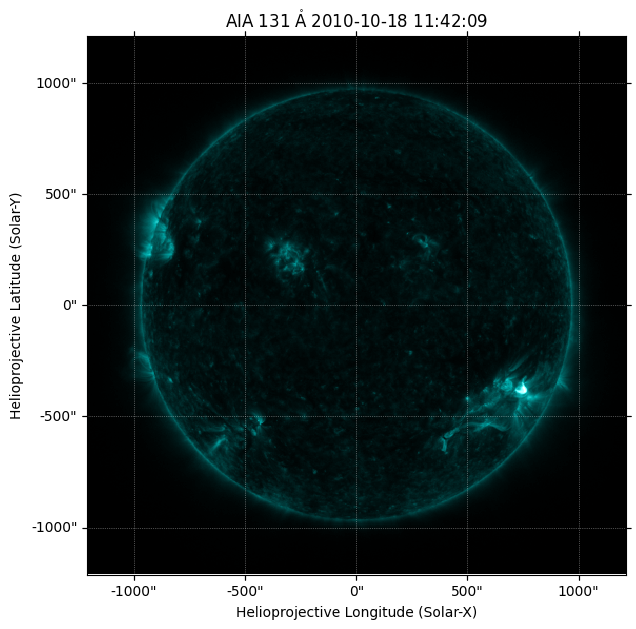

In [219]:
selected_image = data[seq_index[0],:,:]
selected_headr = { keys: values[seq_index[0]] for keys, values in data.attrs.items() }

my_map = Map((np.array(selected_image), selected_headr))
plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=my_map)
my_map.plot()


<sunpy.map.sources.sdo.AIAMap object at 0x0000022978C38370>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 1
Detector:		 AIA
Measurement:		 131.0 Angstrom
Wavelength:		 131.0 Angstrom
Observation Date:	 2010-10-18 11:42:09
Exposure Time:		 2.901348 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [4.73696632 4.73696632] arcsec / pix
Reference Pixel:	 [255.25 255.25] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[0.11247117, 0.11237352, 0.11454587, ..., 0.02341124, 0.05259806,
        0.04664847],
       [0.08005045, 0.06676798, 0.07400688, ..., 0.07951757, 0.09778561,
        0.0215629 ],
       [0.10030927, 0.08543479, 0.11820064, ..., 0.07824193, 0.0805261 ,
        0.09977458],
       ...,
       [0.09612438, 0.05390838, 0.05665853, ..., 0.05380139, 0.04750482,
        0.10496664],
       [0.03819792, 0.11213331, 0.10803304, ..., 0.01170562, 0.20629014,
        0.157582  ],
       [0.06401222, 0.08964048, 0.08753738, ..., 0.05221046, 0.07946356,
        0.10486528]], dtype=float32)
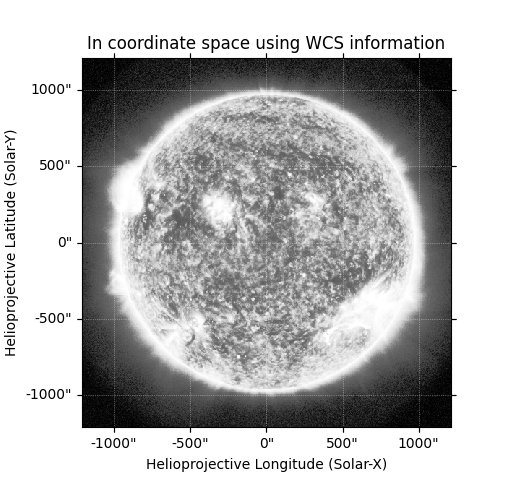
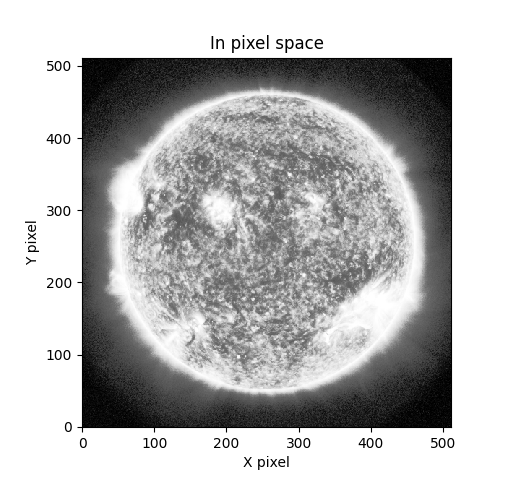
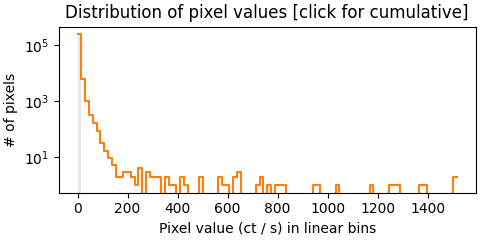
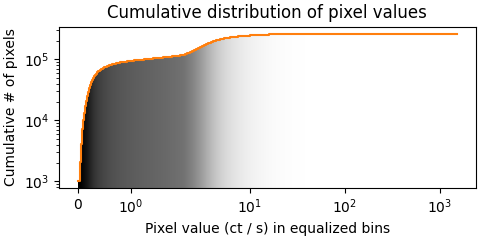

In [220]:
my_map

## Generating an AIA animation

In [217]:
maps = []

for i in seq_index:
    selected_image = da.from_array(data)[i, :, :]
    selected_headr = {keys: values[i] for keys, values in data.attrs.items()}
    maps.append(Map((np.array(selected_image), selected_headr)))

sq = Map(maps, sequence=True, sortby="date")

In [175]:
from sunpy.visualization import axis_labels_from_ctype, wcsaxes_compat
from matplotlib import animation

def animate_sequence(sequence):
    """
    An animation plotting routine to animate each element in MapSequence

    Parameters
    ----------
    sequence : `sunpy.map.mapsequence.MapSequence`
        a set of sunpy maps to animate

    Returns
    -------
    `matplotlib.animation.FuncAnimation`
        A FuncAnimation instance.
    """

    # fig, ax = plt.subplots(figsize=(7,7),
    #                       subplot_kw=dict(projection=sequence[0].wcs)
    #                      )

    ax = wcsaxes_compat.gca_wcs(sequence[0].wcs)
    fig = ax.get_figure()
    fig.figsize = (7, 7)

    plot_obj = sequence[0].plot()
    ax.set_title(sequence[0].latex_name)

    cbar = plt.colorbar()

    def update_fig(i):
        ax.set_title(sequence[i].latex_name)

        # set the data to that of the image being plot
        # Each image should be scaled as the first.
        plot_obj.set_data(sequence[i].data)

        # reset the WCS to that of the image being plot
        plot_obj.axes.reset_wcs(sequence[i].wcs)

        wcsaxes_compat.default_wcs_grid(ax)
        ax.set_xlabel(
            axis_labels_from_ctype(
                sequence[i].coordinate_system[0], sequence[i].spatial_units[0]
            )
        )
        ax.set_ylabel(
            axis_labels_from_ctype(
                sequence[i].coordinate_system[1], sequence[i].spatial_units[1]
            )
        )

        # basic test:
        # expect the wcs of the plot_obj to follow the sequence
        # print(sequence[i].wcs == plot_obj.axes.wcs, sequence[0].wcs == sequence[i].wcs)
        return (plot_obj,)

    anim = animation.FuncAnimation(
        fig, update_fig, init_func=None, frames=len(sequence), interval=60, repeat=True
    )
    plt.close(fig)

    return anim

In [218]:
anim = animate_sequence(sq)
HTML(anim.to_jshtml())

In [3]:
import numpy as np

# exptime = np.array(data.attrs["EXPTIME"])
t_obs = np.array(data.attrs["T_OBS"])

KeyboardInterrupt: 

In [5]:
# select indices where the exposure time is less than 2 seconds
index = np.where(exptime < 3.0)
selected_images = da.from_array(data)[index[0], :, :]
selected_images

dask.array<getitem, shape=(6135, 512, 512), dtype=float32, chunksize=(120, 512, 512), chunktype=numpy.ndarray>

In [6]:
{ keys for keys, values in data.attrs.items() }

{'ACS_CGT',
 'ACS_ECLP',
 'ACS_MODE',
 'ACS_SAFE',
 'ACS_SUNP',
 'AECDELAY',
 'AECMODE',
 'AECTYPE',
 'AGT1SVY',
 'AGT1SVZ',
 'AGT2SVY',
 'AGT2SVZ',
 'AGT3SVY',
 'AGT3SVZ',
 'AGT4SVY',
 'AGT4SVZ',
 'AIAECENF',
 'AIAECTI',
 'AIAGP1',
 'AIAGP10',
 'AIAGP2',
 'AIAGP3',
 'AIAGP4',
 'AIAGP5',
 'AIAGP6',
 'AIAGP7',
 'AIAGP8',
 'AIAGP9',
 'AIAHFSN',
 'AIASEN',
 'AIAWVLEN',
 'AICFGDL1',
 'AICFGDL2',
 'AICFGDL3',
 'AICFGDL4',
 'AIFCPS',
 'AIFDBID',
 'AIFILTYP',
 'AIFOENFL',
 'AIFRMLID',
 'AIFTSID',
 'AIFTSWTH',
 'AIFWEN',
 'AIHIS192',
 'AIHIS348',
 'AIHIS604',
 'AIHIS860',
 'AIHISMXB',
 'AIMGFSN',
 'AIMGOTS',
 'AIMGOTSS',
 'AIMGSHCE',
 'AIMGSHEN',
 'AIMGTYP',
 'AIMSHCBC',
 'AIMSHCBE',
 'AIMSHCTC',
 'AIMSHCTE',
 'AIMSHOBC',
 'AIMSHOBE',
 'AIMSHOTC',
 'AIMSHOTE',
 'AISTATE',
 'AIVNMST',
 'ASD_REC',
 'ASQFSN',
 'ASQHDR',
 'ASQTNUM',
 'BITPIX',
 'BLANK',
 'BSCALE',
 'BZERO',
 'CAMERA',
 'CAR_ROT',
 'CDELT1',
 'CDELT2',
 'CHECKSUM',
 'COMMENT',
 'CRLN_OBS',
 'CRLT_OBS',
 'CROTA2',
 'CRPIX1',
 'CRPIX

In [7]:
from pprint import pprint

selected_image = da.from_array(data)[0, :, :]
selected_headr = {keys: values[0] for keys, values in data.attrs.items()}
print(selected_image)
pprint(selected_headr)

dask.array<getitem, shape=(512, 512), dtype=float32, chunksize=(512, 512), chunktype=numpy.ndarray>
{'ACS_CGT': 'GT3',
 'ACS_ECLP': 'NO',
 'ACS_MODE': 'SCIENCE',
 'ACS_SAFE': 'NO',
 'ACS_SUNP': 'YES',
 'AECDELAY': 1538,
 'AECMODE': 'ON',
 'AECTYPE': 0,
 'AGT1SVY': -4,
 'AGT1SVZ': 5,
 'AGT2SVY': -3,
 'AGT2SVZ': -5,
 'AGT3SVY': -1,
 'AGT3SVZ': 1,
 'AGT4SVY': -1,
 'AGT4SVZ': 1,
 'AIAECENF': 1,
 'AIAECTI': 0,
 'AIAGP1': 0,
 'AIAGP10': 748,
 'AIAGP2': 0,
 'AIAGP3': 0,
 'AIAGP4': 0,
 'AIAGP5': 0,
 'AIAGP6': 0,
 'AIAGP7': 0,
 'AIAGP8': 280,
 'AIAGP9': 344,
 'AIAHFSN': 11021288,
 'AIASEN': 0,
 'AIAWVLEN': 1,
 'AICFGDL1': 0,
 'AICFGDL2': 24,
 'AICFGDL3': 88,
 'AICFGDL4': 236,
 'AIFCPS': 12,
 'AIFDBID': 241,
 'AIFILTYP': 0,
 'AIFOENFL': 1,
 'AIFRMLID': 2908,
 'AIFTSID': 40962,
 'AIFTSWTH': 0,
 'AIFWEN': 270,
 'AIHIS192': 0,
 'AIHIS348': 0,
 'AIHIS604': 0,
 'AIHIS860': 0,
 'AIHISMXB': 0,
 'AIMGFSN': 4,
 'AIMGOTS': 1661644844,
 'AIMGOTSS': 45822,
 'AIMGSHCE': 2900,
 'AIMGSHEN': 13,
 'AIMGTYP': 0,


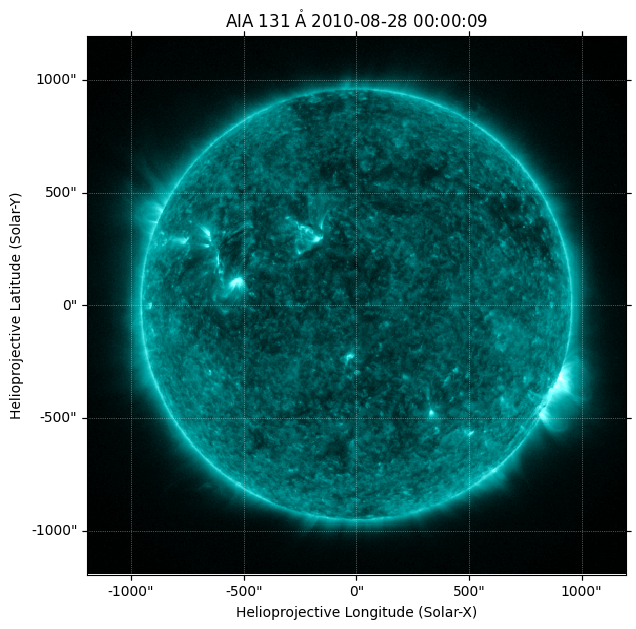

In [8]:
from sunpy.map import Map
import matplotlib.pyplot as plt

my_map = Map((np.array(selected_image), selected_headr))
plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=my_map)
my_map.plot()

<sunpy.map.sources.sdo.AIAMap object at 0x00000229D8DCF820>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 1
Detector:		 AIA
Measurement:		 131.0 Angstrom
Wavelength:		 131.0 Angstrom
Observation Date:	 2010-08-28 00:00:09
Exposure Time:		 2.900841 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [4.6723186 4.6723186] arcsec / pix
Reference Pixel:	 [255.25 255.25] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[0.12568463, 0.07278939, 0.17283894, ..., 0.05083498, 0.06450896,
        0.05265265],
       [0.07446809, 0.07602382, 0.05988555, ..., 0.06305364, 0.17739329,
        0.1467689 ],
       [0.07708278, 0.05052263, 0.06878579, ..., 0.05721202, 0.03408391,
        0.04477778],
       ...,
       [0.13153763, 0.09166898, 0.10897525, ..., 0.05570284, 0.1144699 ,
        0.0343929 ],
       [0.07136131, 0.06958536, 0.11319806, ..., 0.10581806, 0.04857606,
        0.10052032],
       [0.11838474, 0.07634506, 0.08455662, ..., 0.01719645, 0.05219925,
        0.09426066]], dtype=float32)
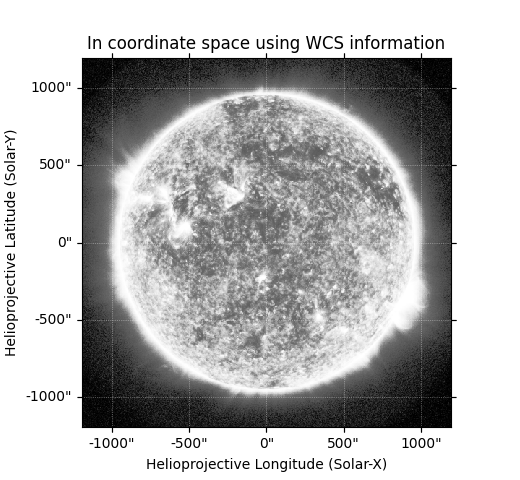
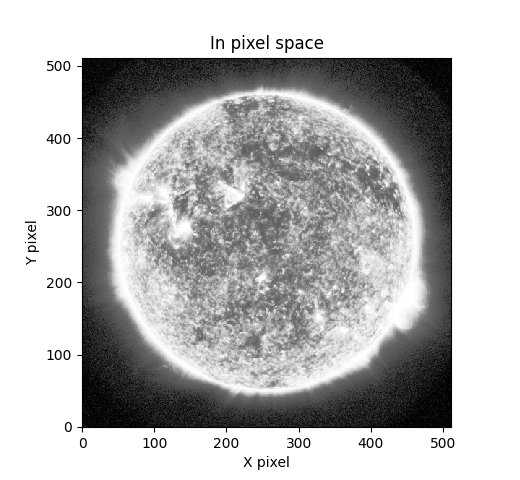
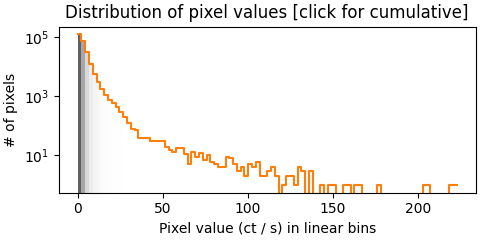
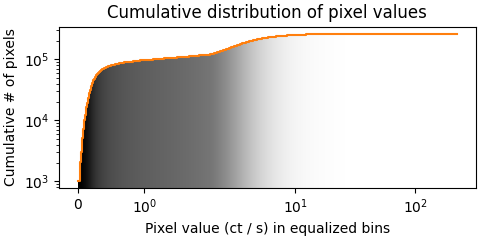

In [9]:
my_map